# Utility

In [1]:
from acados_tool.plotFcn import *
import numpy as np

def plot_traj(traj_actual, time_actual, opt):
    if (opt==1):
        plotTrackProj(traj_actual[:], opt=opt, vel=True, whole=True)
    elif (opt==2):
        plotTrackProj(traj_actual[:-3], opt=opt, vel=True, whole=True)
        
    if (opt==1):
        map_name = 'LMS_Track.txt'
    elif (opt==2):
        map_name = 'bigger_track.txt'

    step = 0
    for i in range(0, time_actual.shape[0]-1):
        step += (int)(time_actual[i][1])
        x,y,_,_ = transformProj2Orig(traj_actual[step][0],traj_actual[step][1],0,0,map_name)
        plt.plot(x,y,"go",markersize=12, alpha=.5)
        
def calc_info(traj_actual, time_actual):
    plt.figure()

    prog_t = []
    calc_t = []
    diff_t = []
    progress = []
    iter_num = []
    step = 0
    for i in range(0, time_actual.shape[0]-1):
        step += time_actual[i][1]
        progress += [traj_actual[(int)(step)][0]]

        prog_t += [time_actual[i][2]]
        calc_t += [time_actual[i][0]]
        diff_t += [time_actual[i][2]-time_actual[i][0]]
        iter_num += [time_actual[i][3]]


    plt.plot(prog_t[1:], 'gx')
    plt.plot(calc_t[1:], 'bx')
    plt.show()

    plt.plot(prog_t[1:], 'gx-', label='progress time')
    plt.plot(calc_t[1:], 'bx-', label='NMPC recalculation time')
    plt.xlabel('The release point of the NMPC recalculation result')
    plt.ylabel('Time [ms]')
    plt.legend()
    plt.show()

    plt.plot(diff_t[1:], 'bx')
    plt.plot([0,8],[0,0], 'r')
    plt.show()

    n, bins, patches = plt.hist(diff_t[1:], 5, facecolor='blue', alpha=0.5, rwidth=0.9)
    plt.xlabel('Progress time minus Calculation time at each step [ms]')
    plt.ylabel('Count')
    plt.title('Histogram')
    plt.show()

    print("prog_t max: ", max(prog_t[1:]), " - min: ", min(prog_t[1:]), " - avg: ", np.mean(prog_t[1:]))
    print("calc_t max: ", max(calc_t[1:]), " - min: ", min(calc_t[1:]), " - avg: ", np.mean(calc_t[1:]))
    print("iter_num max: ", max(iter_num[1:]), " - min: ", min(iter_num[1:]), " - avg: ", np.mean(iter_num[1:]))
    
    return prog_t, calc_t, diff_t, iter_num

# Track 1

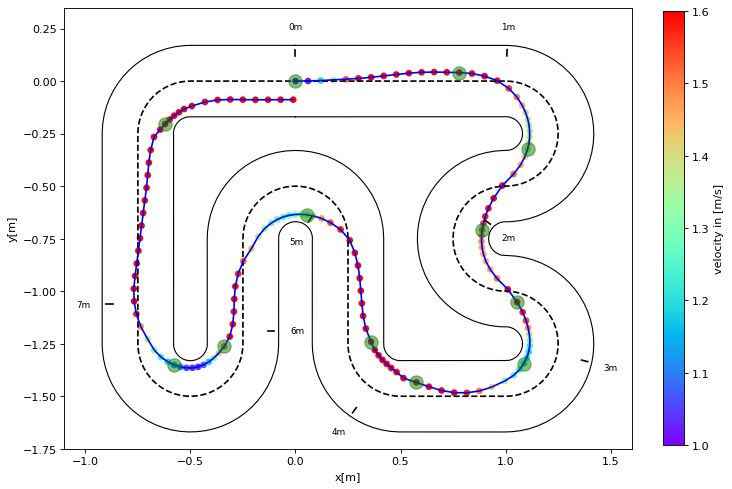

In [2]:
traj_actual = np.loadtxt("../result/triggering/track1/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
time_actual = np.loadtxt("../result/triggering/track1/N30/traj_time.txt", usecols=range(0,), dtype=np.float32)
plot_traj(traj_actual, time_actual, 1)

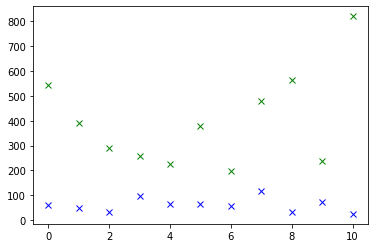

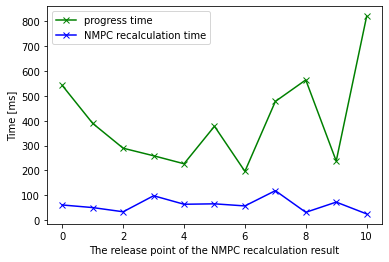

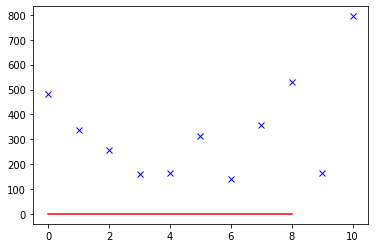

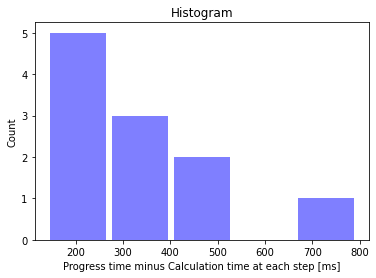

prog_t max:  819.98944  - min:  196.48201  - avg:  398.2113
calc_t max:  118.843  - min:  25.414  - avg:  61.95663
iter_num max:  20.0  - min:  6.0  - avg:  10.181818


In [3]:
prog_t, calc_t, diff_t, iter_num = calc_info(traj_actual, time_actual)

## reach iter max

In [4]:
[print("step: ", i, ", iter num: ", e, ", KKT: ", time_actual[i][-1]) for i, e in enumerate(iter_num) if e > 15]
print("TOTAL recal num: ", time_actual.shape[0])
print("TOTAL computation time: ", sum(time_actual[:,0]))
print("lap time: ", traj_actual[-1])

step:  8 , iter num:  20.0 , KKT:  0.000123
TOTAL recal num:  13
TOTAL computation time:  874.1580009460449
lap time:  [ 8.700000e+00 -8.848600e-02 -7.742000e-03  1.599979e+00  3.288320e-01
  1.396900e-02  4.774574e+00]


# Track 2

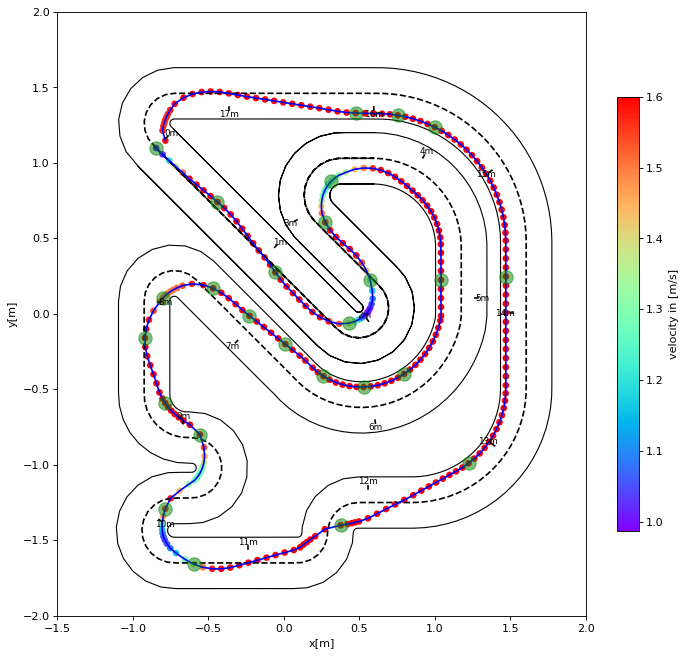

In [5]:
traj_actual = np.loadtxt("../result/triggering/track2/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
time_actual = np.loadtxt("../result/triggering/track2/N30/traj_time.txt", usecols=range(0,), dtype=np.float32)
plot_traj(traj_actual, time_actual, 2)

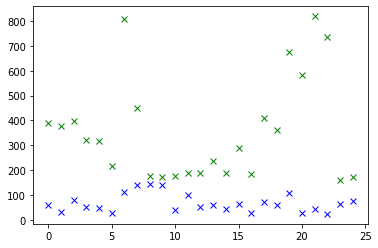

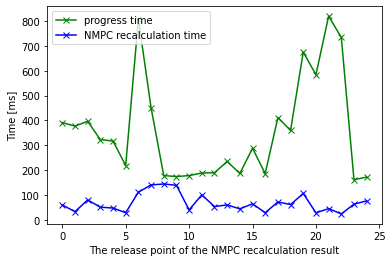

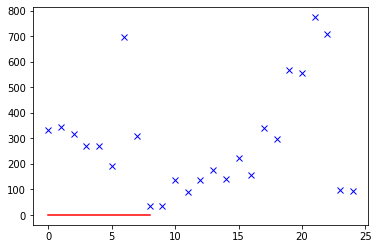

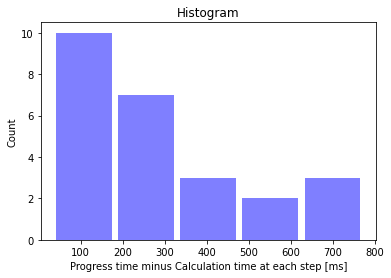

prog_t max:  819.2387  - min:  161.8327  - avg:  360.43835
calc_t max:  144.634  - min:  24.264  - avg:  68.49605
iter_num max:  20.0  - min:  4.0  - avg:  10.36


In [6]:
prog_t, calc_t, diff_t, iter_num = calc_info(traj_actual, time_actual)

In [7]:
[print("step: ", i, ", iter num: ", e, ", KKT: ", time_actual[i][-1]) for i, e in enumerate(iter_num) if e > 15]
print("TOTAL recal num: ", time_actual.shape[0])
print("TOTAL computation time: ", sum(time_actual[:,0]))
print("lap time: ", traj_actual[-1])

step:  0 , iter num:  16.0 , KKT:  8.4e-05
step:  8 , iter num:  20.0 , KKT:  0.000107
step:  9 , iter num:  20.0 , KKT:  0.00019
step:  10 , iter num:  20.0 , KKT:  0.000228
step:  20 , iter num:  17.0 , KKT:  8.5e-05
TOTAL recal num:  27
TOTAL computation time:  1818.9890213012695
lap time:  [18.       -0.048495 -0.177077  1.600006  0.785415  0.348217 10.075381]
